C:\Users\AminIdr\AppData\Local\Temp\ipykernel_4752\1258452744.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


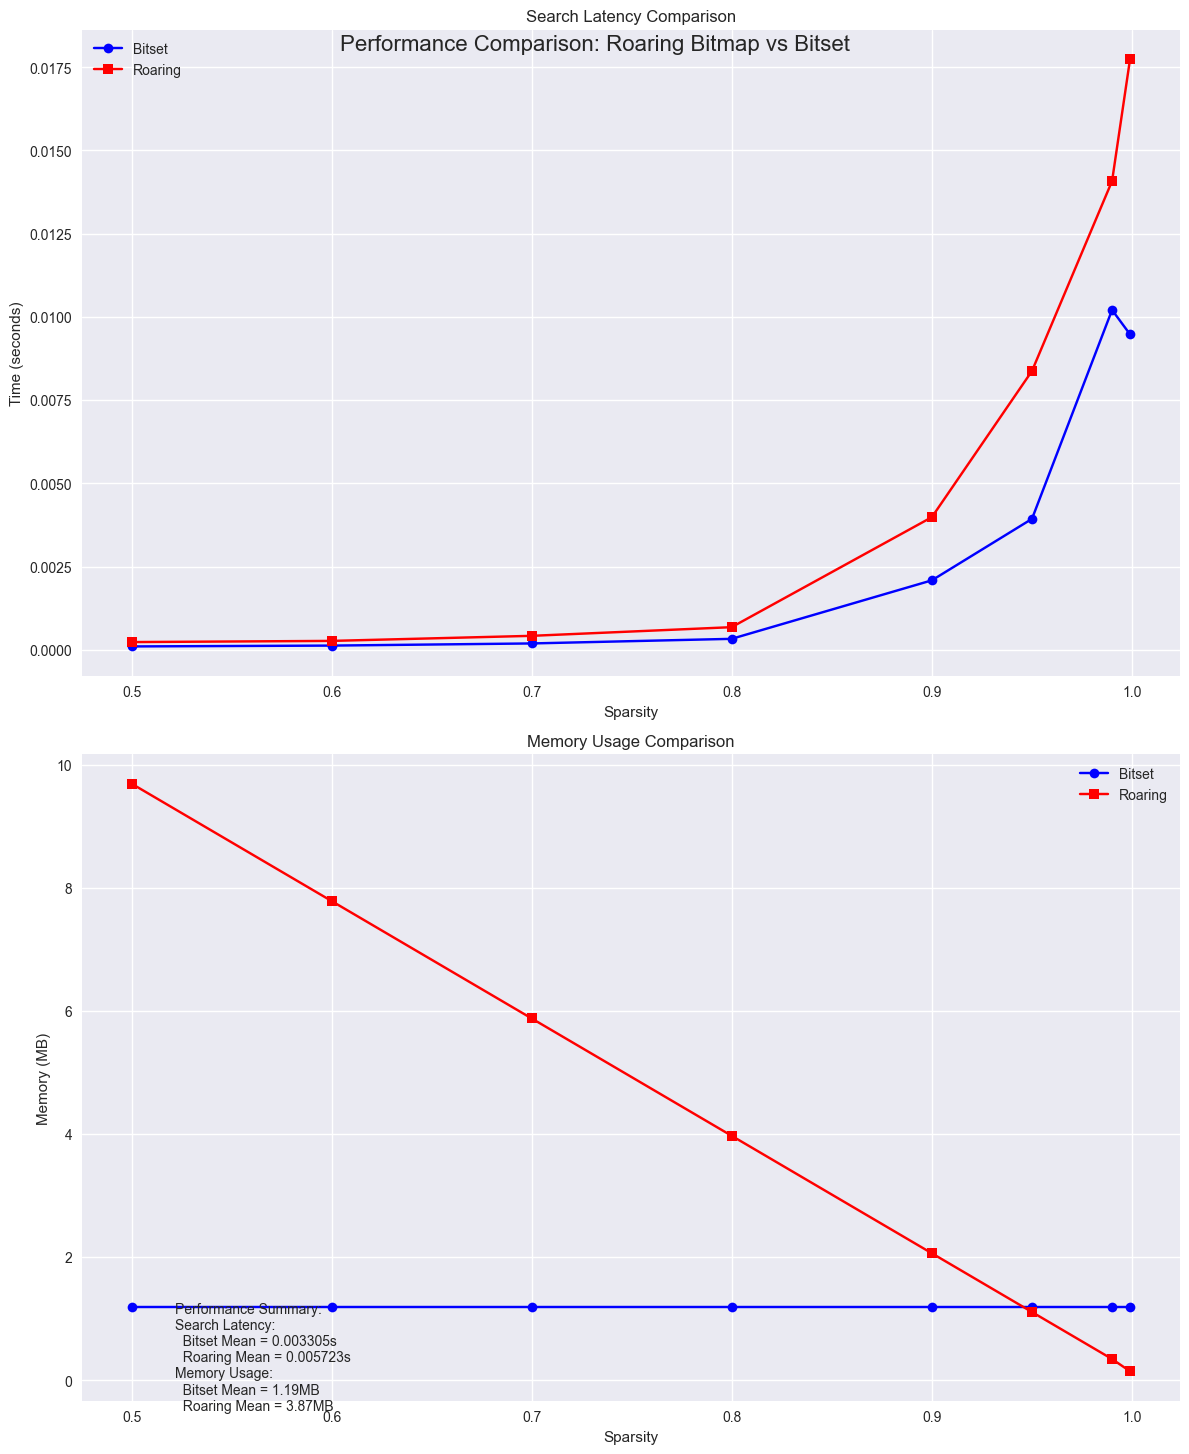


Detailed Performance Statistics:
--------------------------------------------------

Bitset:

Search Latency:
count    8.000000
mean     0.003305
std      0.004251
min      0.000100
25%      0.000174
50%      0.001207
75%      0.005317
max      0.010207
Name: search_latency, dtype: float64

Memory:
count          8.0
mean     1250000.0
std            0.0
min      1250000.0
25%      1250000.0
50%      1250000.0
75%      1250000.0
max      1250000.0
Name: memory, dtype: float64

Roaring:

Search Latency:
count    8.000000
mean     0.005723
std      0.006949
min      0.000231
25%      0.000381
50%      0.002331
75%      0.009801
max      0.017749
Name: search_latency, dtype: float64

Memory:
count    8.000000e+00
mean     4.059886e+06
std      3.769205e+06
min      1.501660e+05
25%      9.603640e+05
50%      3.162387e+06
75%      6.662464e+06
max      1.015981e+07
Name: memory, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV files
bitset_df = pd.read_csv('benchmark_results.csv')
roaring_df = pd.read_csv('roaring_benchmark_results.csv')

# Create the plot
plt.style.use('seaborn')
fig, axes = plt.subplots(2, 1, figsize=(12, 15))
fig.suptitle('Performance Comparison: Roaring Bitmap vs Bitset', fontsize=16, y=0.95)

# Search Latency
axes[0].plot(bitset_df['sparsity'], bitset_df['search_latency'], 
             marker='o', color='blue', linestyle='-', label='Bitset')
axes[0].plot(roaring_df['sparsity'], roaring_df['search_latency'], 
             marker='s', color='red', linestyle='-', label='Roaring')
axes[0].set_title('Search Latency Comparison')
axes[0].set_xlabel('Sparsity')
axes[0].set_ylabel('Time (seconds)')
axes[0].grid(True)
axes[0].legend()

# Memory Usage (convert to MB)
axes[1].plot(bitset_df['sparsity'], bitset_df['memory']/1024/1024, 
             marker='o', color='blue', linestyle='-', label='Bitset')
axes[1].plot(roaring_df['sparsity'], roaring_df['memory']/1024/1024, 
             marker='s', color='red', linestyle='-', label='Roaring')
axes[1].set_title('Memory Usage Comparison')
axes[1].set_xlabel('Sparsity')
axes[1].set_ylabel('Memory (MB)')
axes[1].grid(True)
axes[1].legend()

# Add summary statistics
summary_text = f"""
Performance Summary:
Search Latency: 
  Bitset Mean = {bitset_df['search_latency'].mean():.6f}s
  Roaring Mean = {roaring_df['search_latency'].mean():.6f}s
Memory Usage: 
  Bitset Mean = {bitset_df['memory'].mean()/1024/1024:.2f}MB
  Roaring Mean = {roaring_df['memory'].mean()/1024/1024:.2f}MB
"""

plt.figtext(0.15, 0.02, summary_text, fontsize=10, ha='left', va='bottom')

# Adjust layout and save
plt.tight_layout()
plt.savefig('performance_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# Print detailed statistics
print("\nDetailed Performance Statistics:")
print("-" * 50)
for df_name, df in [("Bitset", bitset_df), ("Roaring", roaring_df)]:
    print(f"\n{df_name}:")
    for metric in ['search_latency', 'memory']:
        print(f"\n{metric.replace('_', ' ').title()}:")
        print(df[metric].describe())
